# ALS Project

## Functional scale analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

##

##

In [6]:
scale = pd.read_csv("data/alsfrs.csv")
print(scale.shape)
scale.head()

(60775, 20)


,subject_id,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostomy,Q5b_Cutting_with_Gastrostomy,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,ALSFRS_Delta,ALSFRS_Total,ALSFRS_R_Total,R_1_Dyspnea,R_2_Orthopnea,R_3_Respiratory_Insufficiency,Mode_of_Administration,ALSFRS_Responded_By
0,329,4.0,3.0,4.0,3.0,2.0,NaN,3.0,2.0,2.0,1.0,3.0,0.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
1,329,4.0,3.0,4.0,3.0,1.5,NaN,3.0,2.0,2.0,1.0,3.0,8.0,26.5,NaN,NaN,NaN,NaN,NaN,NaN
2,329,4.0,3.0,4.0,3.0,1.0,NaN,3.0,2.0,2.0,1.0,3.0,16.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN
3,329,4.0,3.0,4.0,3.0,3.0,NaN,3.0,3.0,2.0,1.0,4.0,42.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,329,4.0,3.0,4.0,3.0,2.0,NaN,3.0,4.0,2.0,2.0,3.0,72.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# rename _delta to study day
scale['study_day'] = scale['ALSFRS_Delta']

In [9]:
# remove 'Mode_of_Administration', 'ALSFRS_Responded_By' column - empty
scale.drop(['Mode_of_Administration','ALSFRS_Responded_By', 'ALSFRS_Delta'],
              axis=1, inplace=True)
scale.head()

,subject_id,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostomy,Q5b_Cutting_with_Gastrostomy,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,ALSFRS_Total,ALSFRS_R_Total,R_1_Dyspnea,R_2_Orthopnea,R_3_Respiratory_Insufficiency,study_day
0,329,4.0,3.0,4.0,3.0,2.0,NaN,3.0,2.0,2.0,1.0,3.0,27.0,NaN,NaN,NaN,NaN,0.0
1,329,4.0,3.0,4.0,3.0,1.5,NaN,3.0,2.0,2.0,1.0,3.0,26.5,NaN,NaN,NaN,NaN,8.0
2,329,4.0,3.0,4.0,3.0,1.0,NaN,3.0,2.0,2.0,1.0,3.0,26.0,NaN,NaN,NaN,NaN,16.0
3,329,4.0,3.0,4.0,3.0,3.0,NaN,3.0,3.0,2.0,1.0,4.0,30.0,NaN,NaN,NaN,NaN,42.0
4,329,4.0,3.0,4.0,3.0,2.0,NaN,3.0,4.0,2.0,2.0,3.0,30.0,NaN,NaN,NaN,NaN,72.0


In [10]:
# max ALSFRS_Total score
print("n ALSFRS_Total: {}".format(sum(scale['ALSFRS_Total'].notnull())))
print("max ALSFRS_Total: {}".format(scale['ALSFRS_Total'].max()))
print("min ALSFRS_Total: {}".format(scale['ALSFRS_Total'].min()))
print()
print("n ALSFRS_R_Total: {}".format(sum(scale['ALSFRS_R_Total'].notnull())))
print("max ALSFRS_R_Total: {}".format(scale['ALSFRS_R_Total'].max()))
print("min ALSFRS_R_Total: {}".format(scale['ALSFRS_R_Total'].min()))

n ALSFRS_Total: 36385
max ALSFRS_Total: 44.0
min ALSFRS_Total: 0.0

n ALSFRS_R_Total: 31498
max ALSFRS_R_Total: 48.0
min ALSFRS_R_Total: 0.0


/Applications/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


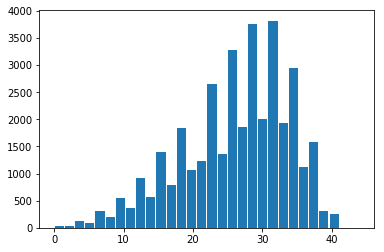

In [11]:
# theoretically the max score is 40! What are there values above this?
plt.hist(scale['ALSFRS_Total'], bins=30, rwidth=0.9)
plt.show()

In [12]:
# there is one record which is wrong.
scale[ scale['ALSFRS_Total']>40]

,subject_id,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostomy,Q5b_Cutting_with_Gastrostomy,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,ALSFRS_Total,ALSFRS_R_Total,R_1_Dyspnea,R_2_Orthopnea,R_3_Respiratory_Insufficiency,study_day
26358,438564,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,44.0,NaN,NaN,NaN,NaN,302.0


In [13]:
# replace the 44 value with 40
scale['ALSFRS_Total'].replace(44, 40, inplace=True)
# fixed. nothing above 40 here. 
scale[ scale['ALSFRS_Total']>40]

,subject_id,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostomy,Q5b_Cutting_with_Gastrostomy,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,ALSFRS_Total,ALSFRS_R_Total,R_1_Dyspnea,R_2_Orthopnea,R_3_Respiratory_Insufficiency,study_day


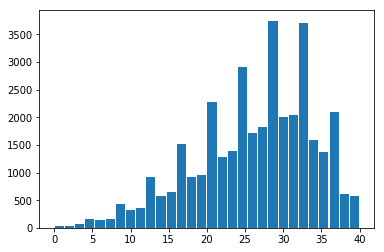

In [14]:
# corrected
plt.hist(scale['ALSFRS_Total'], bins=30, rwidth=0.9)
plt.show()

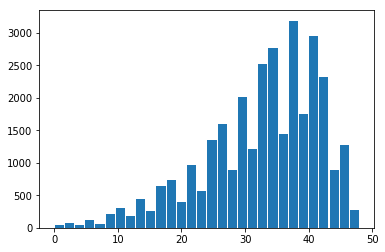

In [15]:
# anything wrong with revised scale?
plt.hist(scale['ALSFRS_R_Total'], bins=30, rwidth=0.9)
plt.show()

In [16]:
# number questionaires per subject
grp_sub_scale = scale.groupby('subject_id')
n_qs = grp_sub_scale['subject_id'].count()
print(n_qs.head())

subject_id
329    12
348    15
533     6
586     1
649    12
Name: subject_id, dtype: int64


In [25]:
print(scale.shape)
scale.head()

(60775, 18)


,subject_id,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostomy,Q5b_Cutting_with_Gastrostomy,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,ALSFRS_Total,ALSFRS_R_Total,R_1_Dyspnea,R_2_Orthopnea,R_3_Respiratory_Insufficiency,study_day
0,329,4.0,3.0,4.0,3.0,2.0,NaN,3.0,2.0,2.0,1.0,3.0,27.0,NaN,NaN,NaN,NaN,0.0
1,329,4.0,3.0,4.0,3.0,1.5,NaN,3.0,2.0,2.0,1.0,3.0,26.5,NaN,NaN,NaN,NaN,8.0
2,329,4.0,3.0,4.0,3.0,1.0,NaN,3.0,2.0,2.0,1.0,3.0,26.0,NaN,NaN,NaN,NaN,16.0
3,329,4.0,3.0,4.0,3.0,3.0,NaN,3.0,3.0,2.0,1.0,4.0,30.0,NaN,NaN,NaN,NaN,42.0
4,329,4.0,3.0,4.0,3.0,2.0,NaN,3.0,4.0,2.0,2.0,3.0,30.0,NaN,NaN,NaN,NaN,72.0


#### Create anchor point for each subject at disease onset date

In [19]:
# merge table with onset data
# load onset dates
onset=pd.read_csv("clean_data/onset_date.csv")

In [22]:
print(onset.shape)
onset.head()

(6879, 3)


,subject_id,Onset_Delta,Diagnosis_Delta
0,329,-1706.0,-1068.0
1,348,-501.0,-302.0
2,533,-1023.0,-44.0
3,586,-715.0,-507.0
4,649,-341.0,NaN


In [26]:
so = scale.merge(onset, how='left', on='subject_id')

In [27]:
print(so.shape)
so.head()

(60775, 20)


,subject_id,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostomy,Q5b_Cutting_with_Gastrostomy,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,ALSFRS_Total,ALSFRS_R_Total,R_1_Dyspnea,R_2_Orthopnea,R_3_Respiratory_Insufficiency,study_day,Onset_Delta,Diagnosis_Delta
0,329,4.0,3.0,4.0,3.0,2.0,NaN,3.0,2.0,2.0,1.0,3.0,27.0,NaN,NaN,NaN,NaN,0.0,-1706.0,-1068.0
1,329,4.0,3.0,4.0,3.0,1.5,NaN,3.0,2.0,2.0,1.0,3.0,26.5,NaN,NaN,NaN,NaN,8.0,-1706.0,-1068.0
2,329,4.0,3.0,4.0,3.0,1.0,NaN,3.0,2.0,2.0,1.0,3.0,26.0,NaN,NaN,NaN,NaN,16.0,-1706.0,-1068.0
3,329,4.0,3.0,4.0,3.0,3.0,NaN,3.0,3.0,2.0,1.0,4.0,30.0,NaN,NaN,NaN,NaN,42.0,-1706.0,-1068.0
4,329,4.0,3.0,4.0,3.0,2.0,NaN,3.0,4.0,2.0,2.0,3.0,30.0,NaN,NaN,NaN,NaN,72.0,-1706.0,-1068.0


In [32]:
so['day_since_onset']= np.abs(so['Onset_Delta']) + so['study_day']
print(so.shape)
so.head(20)

(60775, 21)


,subject_id,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostomy,Q5b_Cutting_with_Gastrostomy,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,...,Q10_Respiratory,ALSFRS_Total,ALSFRS_R_Total,R_1_Dyspnea,R_2_Orthopnea,R_3_Respiratory_Insufficiency,study_day,Onset_Delta,Diagnosis_Delta,day_since_onset
0,329,4.0,3.0,4.0,3.0,2.0,NaN,3.0,2.0,2.0,...,3.0,27.0,NaN,NaN,NaN,NaN,0.0,-1706.0,-1068.0,1706.0
1,329,4.0,3.0,4.0,3.0,1.5,NaN,3.0,2.0,2.0,...,3.0,26.5,NaN,NaN,NaN,NaN,8.0,-1706.0,-1068.0,1714.0
2,329,4.0,3.0,4.0,3.0,1.0,NaN,3.0,2.0,2.0,...,3.0,26.0,NaN,NaN,NaN,NaN,16.0,-1706.0,-1068.0,1722.0
3,329,4.0,3.0,4.0,3.0,3.0,NaN,3.0,3.0,2.0,...,4.0,30.0,NaN,NaN,NaN,NaN,42.0,-1706.0,-1068.0,1748.0
4,329,4.0,3.0,4.0,3.0,2.0,NaN,3.0,4.0,2.0,...,3.0,30.0,NaN,NaN,NaN,NaN,72.0,-1706.0,-1068.0,1778.0
5,329,3.0,3.0,4.0,3.0,4.0,NaN,3.0,4.0,2.0,...,4.0,32.0,NaN,NaN,NaN,NaN,106.0,-1706.0,-1068.0,1812.0
6,329,4.0,3.0,3.0,3.0,1.0,NaN,3.0,3.0,2.0,...,4.0,27.0,NaN,NaN,NaN,NaN,135.0,-1706.0,-1068.0,1841.0
7,329,4.0,4.0,4.0,1.0,1.0,NaN,1.0,2.0,2.0,...,1.0,21.0,NaN,NaN,NaN,NaN,168.0,-1706.0,-1068.0,1874.0
8,329,4.0,2.0,4.0,3.0,1.0,NaN,3.0,2.0,2.0,...,3.0,25.0,NaN,NaN,NaN,NaN,189.0,-1706.0,-1068.0,1895.0
9,329,4.0,4.0,4.0,3.0,3.0,NaN,3.0,3.0,2.0,...,3.0,30.0,NaN,NaN,NaN,NaN,212.0,-1706.0,-1068.0,1918.0


if ALSFRS_R_Total is empty then leave these fields empty: R_1_Dyspnea, R_2_Orthopnea, R_3_Respiratory_Insufficiency, Q5b_Cutting_with_Gastrostomy

In [91]:
# so groupby subjects
g_so = so.groupby('subject_id').count()
print(g_so.shape)
g_so.head()

(6844, 20)


,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostomy,Q5b_Cutting_with_Gastrostomy,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,ALSFRS_Total,ALSFRS_R_Total,R_1_Dyspnea,R_2_Orthopnea,R_3_Respiratory_Insufficiency,study_day,Onset_Delta,Diagnosis_Delta,day_since_onset
subject_id,,,,,,,,,,,,,,,,,,,,
329,12,12,12,12,12,0,12,12,12,12,12,12,0,0,0,0,12,12,12,12
348,15,15,15,15,15,0,15,15,15,15,0,0,15,15,15,15,15,15,15,15
533,6,6,6,6,4,2,6,6,6,6,6,6,6,6,6,6,6,6,6,6
586,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1
649,12,12,12,12,10,2,12,12,12,12,12,12,0,0,0,0,12,12,0,12


In [94]:
# make all values = 4
g_so [ g_so != 4] = 4

In [95]:
g_so['ALSFRS_Total'].replace(4,40, inplace=True)
g_so['ALSFRS_R_Total'].replace(4,48, inplace=True)
g_so['day_since_onset'].replace(4,0, inplace=True)
g_so['Onset_Delta'].replace(4,0, inplace=True)
g_so['Diagnosis_Delta'].replace(4,0, inplace=True)
g_so['study_day'].replace(4,0, inplace=True)

In [96]:
# reset the index (groupby indexed changed)
g_so.reset_index(inplace=True)

In [97]:
print(g_so.shape)
g_so.head()

(6844, 21)


,subject_id,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostomy,Q5b_Cutting_with_Gastrostomy,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,...,Q10_Respiratory,ALSFRS_Total,ALSFRS_R_Total,R_1_Dyspnea,R_2_Orthopnea,R_3_Respiratory_Insufficiency,study_day,Onset_Delta,Diagnosis_Delta,day_since_onset
0,329,4,4,4,4,4,4,4,4,4,...,4,40,48,4,4,4,0,0,0,0
1,348,4,4,4,4,4,4,4,4,4,...,4,40,48,4,4,4,0,0,0,0
2,533,4,4,4,4,4,4,4,4,4,...,4,40,48,4,4,4,0,0,0,0
3,586,4,4,4,4,4,4,4,4,4,...,4,40,48,4,4,4,0,0,0,0
4,649,4,4,4,4,4,4,4,4,4,...,4,40,48,4,4,4,0,0,0,0


In [98]:
# merge g_so with so
scale_onset = pd.concat([so, g_so])

In [99]:
scale_onset.sort_values(by=['subject_id', 'day_since_onset'], inplace=True)

In [101]:
scale_onset.reset_index(drop=True, inplace=True)

,subject_id,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostomy,Q5b_Cutting_with_Gastrostomy,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,...,Q10_Respiratory,ALSFRS_Total,ALSFRS_R_Total,R_1_Dyspnea,R_2_Orthopnea,R_3_Respiratory_Insufficiency,study_day,Onset_Delta,Diagnosis_Delta,day_since_onset
0,329,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,40.0,48.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0
1,329,4.0,3.0,4.0,3.0,2.0,NaN,3.0,2.0,2.0,...,3.0,27.0,NaN,NaN,NaN,NaN,0.0,-1706.0,-1068.0,1706.0
2,329,4.0,3.0,4.0,3.0,1.5,NaN,3.0,2.0,2.0,...,3.0,26.5,NaN,NaN,NaN,NaN,8.0,-1706.0,-1068.0,1714.0
3,329,4.0,3.0,4.0,3.0,1.0,NaN,3.0,2.0,2.0,...,3.0,26.0,NaN,NaN,NaN,NaN,16.0,-1706.0,-1068.0,1722.0
4,329,4.0,3.0,4.0,3.0,3.0,NaN,3.0,3.0,2.0,...,4.0,30.0,NaN,NaN,NaN,NaN,42.0,-1706.0,-1068.0,1748.0
5,329,4.0,3.0,4.0,3.0,2.0,NaN,3.0,4.0,2.0,...,3.0,30.0,NaN,NaN,NaN,NaN,72.0,-1706.0,-1068.0,1778.0
6,329,3.0,3.0,4.0,3.0,4.0,NaN,3.0,4.0,2.0,...,4.0,32.0,NaN,NaN,NaN,NaN,106.0,-1706.0,-1068.0,1812.0
7,329,4.0,3.0,3.0,3.0,1.0,NaN,3.0,3.0,2.0,...,4.0,27.0,NaN,NaN,NaN,NaN,135.0,-1706.0,-1068.0,1841.0
8,329,4.0,4.0,4.0,1.0,1.0,NaN,1.0,2.0,2.0,...,1.0,21.0,NaN,NaN,NaN,NaN,168.0,-1706.0,-1068.0,1874.0
9,329,4.0,2.0,4.0,3.0,1.0,NaN,3.0,2.0,2.0,...,3.0,25.0,NaN,NaN,NaN,NaN,189.0,-1706.0,-1068.0,1895.0


In [100]:
print(scale_onset.shape)
scale_onset.head()

(67619, 21)


,subject_id,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostomy,Q5b_Cutting_with_Gastrostomy,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,...,Q10_Respiratory,ALSFRS_Total,ALSFRS_R_Total,R_1_Dyspnea,R_2_Orthopnea,R_3_Respiratory_Insufficiency,study_day,Onset_Delta,Diagnosis_Delta,day_since_onset
0,329,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,40.0,48.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0
0,329,4.0,3.0,4.0,3.0,2.0,NaN,3.0,2.0,2.0,...,3.0,27.0,NaN,NaN,NaN,NaN,0.0,-1706.0,-1068.0,1706.0
1,329,4.0,3.0,4.0,3.0,1.5,NaN,3.0,2.0,2.0,...,3.0,26.5,NaN,NaN,NaN,NaN,8.0,-1706.0,-1068.0,1714.0
2,329,4.0,3.0,4.0,3.0,1.0,NaN,3.0,2.0,2.0,...,3.0,26.0,NaN,NaN,NaN,NaN,16.0,-1706.0,-1068.0,1722.0
3,329,4.0,3.0,4.0,3.0,3.0,NaN,3.0,3.0,2.0,...,4.0,30.0,NaN,NaN,NaN,NaN,42.0,-1706.0,-1068.0,1748.0


## Individual Subject Data

In [17]:
# plot each score
Qs=['Q1_Speech', 'Q2_Salivation', 'Q3_Swallowing', 'Q4_Handwriting', 
    'Q5a_Cutting_without_Gastrostomy', 'Q5b_Cutting_with_Gastrostomy', 
    'Q6_Dressing_and_Hygiene', 'Q7_Turning_in_Bed', 'Q8_Walking', 'Q9_Climbing_Stairs', 
    'Q10_Respiratory', 'R_1_Dyspnea', 'R_2_Orthopnea', 
    'R_3_Respiratory_Insufficiency']

def plot_q_scores(df):
    if len(df)> 200:
        return "df is too long"
    plt.figure(figsize=(12,6))
    
    for feature in df[Qs]:
        if np.all(df[feature].isnull()):
            continue
        if feature == 'ALSFRS_R_Total' or feature == 'ALSFRS_Total':
            plt.plot(df['study_day'], df[feature], color='red')
        else:
            plt.plot(df['study_day'], df[feature])
    plt.title("Individual Change in Functional Assessment")
    plt.show()

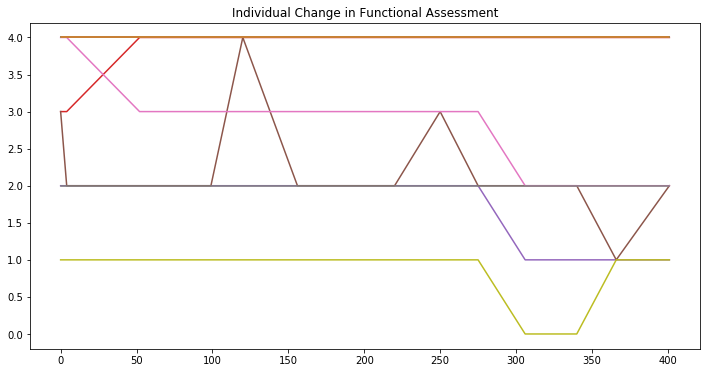

In [18]:
subject = scale[ scale['subject_id']==348]
plot_q_scores(subject)